# https://scikit-learn.org/stable/

In [1]:
import pandas as pd
df = pd.read_csv("carprices.csv")
df.count()

Mileage          20
Age(yrs)         20
Sell Price($)    20
dtype: int64

In [2]:
df.head(5)

,Mileage,Age(yrs),Sell Price($)
0,69000,6,18000
1,35000,3,34000
2,57000,5,26100
3,22500,2,40000
4,46000,4,31500


In [3]:
df.dtypes

Mileage          int64
Age(yrs)         int64
Sell Price($)    int64
dtype: object

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Mileage,20.0,59736.50,20595.441825,22500.0,50500.0,59000.0,73750.00,91000.0
Age(yrs),20.0,5.15,1.785173,2.0,4.0,5.0,6.25,8.0
Sell Price($),20.0,25197.50,7834.479713,12000.0,19375.0,26050.0,31625.00,40000.0


In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0, 0.5, 'Sell Price($)')

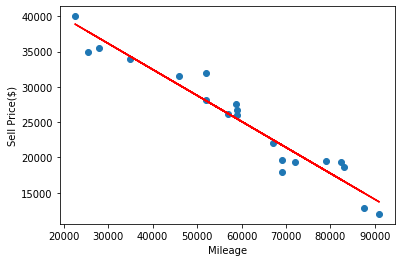

In [6]:
import scipy.stats as st

model = st.linregress(df['Mileage'], df['Sell Price($)'])
y_values = df['Mileage'] * model[0] + model[1]

plt.scatter(df['Mileage'],df['Sell Price($)'])
plt.plot(df['Mileage'], y_values, color="red")
plt.xlabel('Mileage')
plt.ylabel('Sell Price($)')

Text(0, 0.5, 'Sell Price($)')

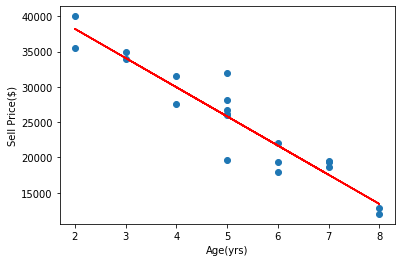

In [7]:
model = st.linregress(df['Age(yrs)'], df['Sell Price($)'])
y_values = df['Age(yrs)'] * model[0] + model[1]

plt.scatter(df['Age(yrs)'],df['Sell Price($)'])
plt.plot(df['Age(yrs)'], y_values, color="red")
plt.xlabel('Age(yrs)')
plt.ylabel('Sell Price($)')

### Determie which column is dependent variable and which are independent variables

In [22]:
# Drop the column that is identified as the dependent variable
# way 1
X = df.drop(columns=['Sell Price($)'])
X.head(5)

,Mileage,Age(yrs)
0,69000,6
1,35000,3
2,57000,5
3,22500,2
4,46000,4


In [23]:
# way 2
X = df[['Mileage','Age(yrs)']]
X.count()

Mileage     20
Age(yrs)    20
dtype: int64

In [24]:
y = df['Sell Price($)']

In [25]:
# Without random_state, everytime get different random train and test subsets

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.1,random_state=42)

In [26]:
len(X_train)

18

In [27]:
from sklearn.linear_model import LinearRegression
clf = LinearRegression()
clf.fit(X_train, y_train)

LinearRegression()

In [15]:
y_pred = clf.predict(X_test)
y_pred

    Mileage  Age(yrs)
0     69000         6
17    69000         5


array([22179.32124029, 23346.93113916])

In [28]:
pd.DataFrame({
            "Mileage": X_test['Mileage'],
            "Age": X_test['Age(yrs)'],
            "Sell Price": y_test
            })

,Mileage,Age,Sell Price
0,69000,6,18000
17,69000,5,19700


In [29]:
y_pred = clf.predict(X_test)
y_pred

array([22179.32124029, 23346.93113916])

In [19]:
import numpy as np

pd.DataFrame({
            "predict": y_pred.round(2),
            "actual": y_test
            })

,predict,actual
0,22179.32,18000
17,23346.93,19700


In [20]:
z = pd.DataFrame({
    "mileage": [35000],
    "Age": [3]
})

y_pred = clf.predict(z)
y_pred.round(2)

array([34553.4])

In [21]:
df.loc[(df["Mileage"]<=35000) & (df["Age(yrs)"]<=3)]

,Mileage,Age(yrs),Sell Price($)
1,35000,3,34000
3,22500,2,40000
15,25400,3,35000
16,28000,2,35500
